# Text Analytics
<img align="right" style="padding-right:10px;" src="figures_wk7/text_mining.png" width=400>

Text analytics is the process of uncovering insights, trends, and patterns out of written communication (known as text). 

## Text Analysis vs Text Analytics - What's the difference?
The terms text analysis, and text analytics are often used interchangeably. The goal both is the same, analyzing unstructured text to obtain insights. However, there are slight difference between the terms. 

Text Analysis is about parsing text to create structured data from unstructured text. Text analytics aggregates these results and turns them into something that can be quantified and visualized through charts and reports. Text analysis and text analytics often work together to provide a complete understanding of all kinds of text, like emails, social media posts, surveys, customer support tickets, and more.

For example, you can use text analysis tools to find out how people feel toward a brand on social media (sentiment analysis), or understand the main topics in product reviews (topic detection). Text analytics, on the other hand, leverages the results of text analysis to identify patterns, such as a spike in negative feedback, and provides you with actionable insights you can use to make improvements, like fixing a bug that’s frustrating your users.

Reference:
> Text Analytics Basics: A Beginner's Guide<br>
> https://monkeylearn.com/blog/what-is-text-analytics/

## Other Related Terms

### Text Mining
Text mining is the process of deriving high-quality information from text. Hmmm... Seems like I've heard a very similar definition to that recently. Depending on who you talk to, which article you read, etc., texting mining is either the same process as text analysis or text analytics. 

### Natural Language Processing (NLP)?
Natural Language Processing is the  categorizing, clustering and tagging text, summarizing data sets, creating taxonomies, and extracting information about things like word frequencies and relationships between data entities. Analytical models are then run to generate findings that can help drive business strategies and operational actions.

References:
> What is Text Mining, Text Analytics and Natural Language Processing?
> https://www.linguamatics.com/what-text-mining-text-analytics-and-natural-language-processing

> Top 10 Python Libraries for Natural Language Processing (2018)
> https://kleiber.me/blog/2018/02/25/top-10-python-nlp-libraries-2018/"

## Text Analytics - 20 NewsGroups Dataset
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. 

### Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

<div class="alert alert-block alert-danger">
<b>Important::</b> This is a fairly large, and the following step could take several minutes to complete, the first time you download the dataset!
</div>

In [2]:
news = fetch_20newsgroups()

<div class="alert alert-block alert-info">
<b>sklearn datasets::</b> The sklearn datasets are loaded into a sklearn.utils.Bunch data object. A Bunch is a dictionary-like object that is customized for the specified dataset. <br>
<br>
Here are some of the keys that we will use for this dataset: <br>
    - data: returns the contents of the news post <br>
    - target: return an integer referencing the target value <br>
    - target_names: returns a list of all the targets within the dataset <br>
<br>
You can read more about on the sklearn website: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

</div>

Let's take a look at the data for one of the posts.

In [3]:
print(news.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



Hmmm....  We really don't need all the extra information about the post. Luckily, sklearn allows us to remove the headers and footers when loading the data.

In [4]:
news = fetch_20newsgroups(remove=('headers','footers'))

In [5]:
print(news.data[3])

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.



Well, that helped things out quite a bit. Time to see what other information we have for these posts.

In [6]:
news.target[3]

1

In [7]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Move the data into a Pandas dataframe
I'm going to move our dataset into a Pandas dataframe because I find them easier to work with.

In [8]:
cols = ['raw_text']
news_df = pd.DataFrame(news.data, columns = cols)
news_df.head(10)

,raw_text
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...
4,"From article <C5owCB.n3p@world.std.com>, by to..."
5,In article <1r1eu1$4t@transfer.stratus.com> cd...
6,There were a few people who responded to my re...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...
8,I have win 3.0 and downloaded several icons an...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...


In [9]:
news_df['target'] = pd.Series(news.target)
news_df.head(10)

,raw_text,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16
6,There were a few people who responded to my re...,13
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3
8,I have win 3.0 and downloaded several icons an...,2
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4


In [10]:
news_df['target_category'] = news_df.target.apply(lambda x: news.target_names[x])
news_df.head(10)

,raw_text,target,target_category
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns
6,There were a few people who responded to my re...,13,sci.med
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware


<div class="alert alert-block alert-info">
<b>Artform vs Exact Science::</b> There is more thn one way to achieve the analysis shown in this lecture. I am demostrating a programming approach to manipulate the data to acheive the desired results. There are a number of packages that provide functions that make text analysis effortless and efficient.  However, I want to showcase another approach in this demo.<br>
</div>

### Basic Text Analysis Metrics
We can extract a number of basic metrics about our new posts at this point.

#### Word Count
One of the most basic metrics we can extract is the number of words in each news post. The thought process behind this is type of metric is that negative posts generally contain a lesser amount of words than positive posts do.

To do this, we simply use the split function in python:

In [11]:
news_df['word_cnt'] = news_df.raw_text.apply(lambda x: len(str(x).split(" ")))

In [12]:
news_df.head(10)

,raw_text,target,target_category,word_cnt
0,I was wondering if anyone out there could enli...,7,rec.autos,86
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361
6,There were a few people who responded to my re...,13,sci.med,58
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190


#### Character Count
This metric is also based on the previous feature intuition. Here, we calculate the number of characters in each post.

In [13]:
news_df['char_cnt'] = news_df.raw_text.str.len()
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436
6,There were a few people who responded to my re...,13,sci.med,58,390
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254


Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

news_df['stopwords'] = news_df.raw_text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [15]:
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118
6,There were a few people who responded to my re...,13,sci.med,58,390,20
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87


### Data Cleaning and Prep
As we've seen in prior weeks, after loading our dataset we need to take the time to cleaning and prep the data for further analysis. I'm going to load the cleaned data into another column within the dataframe so that we can observe how the data changes as we progress.

In working with textual data, the cleaning and prep processing generally involves:
* converting to lowercase
* removing punctuation
* removing numbers
* removing stopwords
* word tokenization
* data stemming or lemmization or both

We will only be using lemmatization in this notebook. However, there are a number of tutorials that demonstrate the process of stemming online.

<i>Note:: Depending on the type of textual data you are working with, there might be other areas you need to address.</i>

#### Conver Text to Lowercase
The first data cleaning step we will do is transform our posts into lower case. This avoids having multiple copies of the same words. For example, ‘Analytics’ and ‘analytics’ will appear as two different words.

In [16]:
news_df['clean_text'] = news_df.raw_text.apply(lambda x: " ".join(x.lower() for x in x.split()))
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,i was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,a fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,"well folks, my mac plus finally gave up the gh..."
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert j.c. kyanko (rob@rjck.uucp) wrote: > ab...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,"from article <c5owcb.n3p@world.std.com>, by to..."
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,in article <1r1eu1$4t@transfer.stratus.com> cd...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,there were a few people who responded to my re...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,dxb132@psuvm.psu.edu writes: >in article <1qlb...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,i have win 3.0 and downloaded several icons an...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,jap10@po.cwru.edu (joseph a. pellettiere) writ...


#### Removing Web Addresses and User_ids
Hmmm... I see that our data has web addresses and user_ids within the data. These will not add to our analysis, so I'm going to remove those at this point. 

Why now? Well, if I wait to do this until after I remove punctuation, I lose that ablitiy to match off of the specific patterns I'm looking for

In [17]:
news_df['clean_text'] = news_df.clean_text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
news_df['clean_text'] = news_df.clean_text.str.replace('http\S+','') #looking for http or https web addresses
news_df['clean_text'] = news_df.clean_text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
news_df['clean_text'] = news_df.clean_text.str.replace('\S+.edu','') #looking for email addresses that end in '.edu'
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,i was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,a fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,"well folks, my mac plus finally gave up the gh..."
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert j.c. kyanko wrote: > writes in articl...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,from article by (tom a baker): >>in article ...
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,in article (c. d. tavares) writes: >in artic...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,there were a few people who responded to my re...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,writes: >in article (grubb) says: >>in pc m...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,i have win 3.0 and downloaded several icons an...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,(joseph a. pellettiere) writes: > i am lookin...


#### Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 

In [18]:
news_df['clean_text'] = news_df.clean_text.str.replace('[^\w\s]','')
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,i was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,a fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,well folks my mac plus finally gave up the gho...
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert jc kyanko wrote writes in article ...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,from article by tom a baker in article pac...
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,in article c d tavares writes in article f...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,there were a few people who responded to my re...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,writes in article grubb says in pc magazine...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,i have win 30 and downloaded several icons and...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,joseph a pellettiere writes i am looking for...


#### Removing Digits
Time to remove digits from the individual posts. Like punctuations, digits dosn’t add any extra information to our analysis. 

In [19]:
news_df['clean_text'] = news_df.clean_text.str.replace('\d+','')
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,i was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,a fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,well folks my mac plus finally gave up the gho...
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert jc kyanko wrote writes in article ...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,from article by tom a baker in article pac...
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,in article c d tavares writes in article f...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,there were a few people who responded to my re...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,writes in article grubb says in pc magazine...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,i have win and downloaded several icons and b...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,joseph a pellettiere writes i am looking for...


<div class="alert alert-block alert-info">
<b>Another thought::</b> Here's another approach to removing digits from textual data <br>
  
news_df.raw_text.apply(lambda x: " ".join([word for word in x.split() if word.isalpha()] ))
</div>

#### Removing Stopwords
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries. As I did above, I'll use the nltk for my stopword list.

In [20]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,wondering anyone could enlighten car saw day d...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,fair number brave souls upgraded si clock osci...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,well folks mac plus finally gave ghost weekend...
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert jc kyanko wrote writes article anyone k...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,article tom baker article pack rat writes clea...
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,article c tavares writes article foxvog dougla...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,people responded request info treatment astroc...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,writes article grubb says pc magazine april al...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,win downloaded several icons bmps cant figure ...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,joseph pellettiere writes looking information ...


#### Word Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences

In [21]:
tokens = ' '.join(news_df.clean_text).split()
tokens[:20]

['wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 'door',
 'sports',
 'car',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front']

#### Lemmatization
Lemmatization converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. This will allow us to group similar words together.

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cpearson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's see how lemmatization works!

In [23]:
words = ['cry','cries','studies','studying','writes']
for w in words:
    print("Lemmatization for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemmatization for cry is cry
Lemmatization for cries is cry
Lemmatization for studies is study
Lemmatization for studying is studying
Lemmatization for writes is writes


Alright! Time to apply this to our dataset. I will be writing this data to a new column in the dataframe.

In [24]:
news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
news_df.head(10)

,raw_text,target,target_category,word_cnt,char_cnt,stopwords,clean_text
0,I was wondering if anyone out there could enli...,7,rec.autos,86,475,37,wondering anyone could enlighten car saw day d...
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,83,530,32,fair number brave soul upgraded si clock oscil...
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,295,1659,135,well folk mac plus finally gave ghost weekend ...
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,57,411,16,robert jc kyanko wrote writes article anyone k...
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,141,914,54,article tom baker article pack rat writes clea...
5,In article <1r1eu1$4t@transfer.stratus.com> cd...,16,talk.politics.guns,361,2436,118,article c tavares writes article foxvog dougla...
6,There were a few people who responded to my re...,13,sci.med,58,390,20,people responded request info treatment astroc...
7,DXB132@psuvm.psu.edu writes:\n>In article <1ql...,3,comp.sys.ibm.pc.hardware,584,2476,127,writes article grubb say pc magazine april alt...
8,I have win 3.0 and downloaded several icons an...,2,comp.os.ms-windows.misc,29,174,11,win downloaded several icon bmps cant figure c...
9,jap10@po.CWRU.Edu (Joseph A. Pellettiere) writ...,4,comp.sys.mac.hardware,190,1254,87,joseph pellettiere writes looking information ...


Okay, I think that's all of the data cleansing and prep that I'm going to do at this point. I do need to do a bit of data prep for some of our analytics coming up. As we did with the data cleaning, I'll be creating additional columns within the dataframe for us to see how things morph as we progress.

### Text Analytics 
Time to take a look at some of the more common Text Analytic techniques.

#### Text Visualization - WordCloud
A word cloud is a clustering of the words within a text. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

The first thing we need to do is generate a frequency dictionary for our text data.

In [25]:
freq = pd.Series(' '.join(news_df.clean_text).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:20]

[('one', 8763),
 ('would', 8464),
 ('writes', 7826),
 ('article', 6951),
 ('x', 6014),
 ('people', 5670),
 ('like', 5375),
 ('dont', 5325),
 ('know', 5180),
 ('get', 5122),
 ('time', 4536),
 ('think', 4391),
 ('also', 4127),
 ('use', 3977),
 ('say', 3638),
 ('e', 3540),
 ('year', 3538),
 ('make', 3487),
 ('u', 3420),
 ('im', 3382)]

Hmmm... Looks like we have a couple of other "words" that don't seem to be part of the English language. From what we can tell at this point all these are single letter "words". Not sure where they came from, but they are easily removed.

In [26]:
news_df['clean_text'] = news_df.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(news_df.clean_text).split()).value_counts().to_dict()
list(freq.items())[:20]

[('one', 8763),
 ('would', 8464),
 ('writes', 7826),
 ('article', 6951),
 ('people', 5670),
 ('like', 5375),
 ('dont', 5325),
 ('know', 5180),
 ('get', 5122),
 ('time', 4536),
 ('think', 4391),
 ('also', 4127),
 ('use', 3977),
 ('say', 3638),
 ('year', 3538),
 ('make', 3487),
 ('im', 3382),
 ('well', 3341),
 ('could', 3330),
 ('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 3317)]

Hmmm...  I have no idea what a 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax' is...  I'm going to remove it too

In [27]:
remove = 'maxaxaxaxaxaxaxaxaxaxaxaxaxaxax'
news_df['clean_text'] = news_df.clean_text.str.replace(remove,'')

freq = pd.Series(' '.join(news_df.clean_text).split()).value_counts().to_dict()
list(freq.items())[:20]

[('one', 8763),
 ('would', 8464),
 ('writes', 7826),
 ('article', 6951),
 ('people', 5670),
 ('like', 5375),
 ('dont', 5325),
 ('know', 5180),
 ('get', 5122),
 ('time', 4536),
 ('think', 4391),
 ('also', 4127),
 ('use', 3977),
 ('say', 3638),
 ('year', 3538),
 ('make', 3487),
 ('im', 3382),
 ('well', 3341),
 ('could', 3330),
 ('good', 3314)]

That looks better! Time actually build the WordCloud and display it.

In [28]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

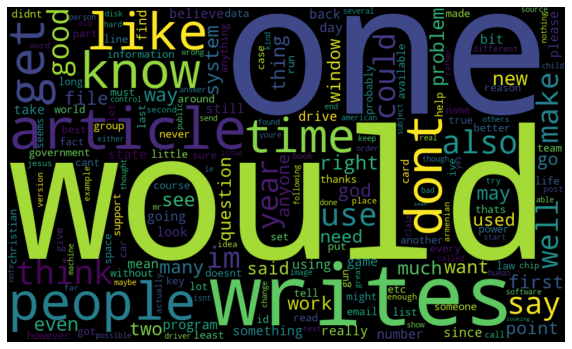

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Not bad at all, if I do say so myself!  I can see that the top 2 words within our dataset are 'would', 'one'. 

#### N-grams
N-grams are the combination of multiple words used together. N-grams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. 

The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

I'm going to use nltk's `bigram()` to create bigrams for our dataset. First thing we need to do is create a list of individual words within our cleaned text.  This is known as tokenization, resulting in a list of tokens.

In [30]:
#regenerate the tokens list, remember we did more data cleaning since we last generated this list
tokens = ' '.join(news_df.clean_text).split()

In [31]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('writes', 'article'), 1409),
 (('dont', 'know'), 902),
 (('article', 'writes'), 673),
 (('would', 'like'), 594),
 (('db', 'db'), 520),
 (('dont', 'think'), 508),
 (('im', 'sure'), 439),
 (('anyone', 'know'), 438),
 (('last', 'year'), 372),
 (('year', 'ago'), 359),
 (('new', 'york'), 351),
 (('united', 'state'), 342),
 (('mr', 'stephanopoulos'), 341),
 (('look', 'like'), 321),
 (('something', 'like'), 296),
 (('thanks', 'advance'), 287),
 (('many', 'people'), 262),
 (('law', 'enforcement'), 255),
 (('clipper', 'chip'), 250),
 (('dont', 'want'), 248)]

Awesome!  Let's try generating `trigrams()` now.

In [32]:
# creating the bigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('db', 'db', 'db'), 513),
 (('writes', 'article', 'writes'), 151),
 (('article', 'writes', 'article'), 150),
 (('center', 'policy', 'research'), 93),
 (('skepticism', 'chastity', 'intellect'), 80),
 (('gordon', 'bank', 'njxp'), 80),
 (('bank', 'njxp', 'skepticism'), 80),
 (('njxp', 'skepticism', 'chastity'), 80),
 (('shameful', 'surrender', 'soon'), 78),
 (('intellect', 'shameful', 'surrender'), 78),
 (('chastity', 'intellect', 'shameful'), 78),
 (('please', 'let', 'know'), 77),
 (('via', 'anonymous', 'ftp'), 71),
 (('would', 'like', 'know'), 67),
 (('would', 'greatly', 'appreciated'), 67),
 (('power', 'play', 'scorer'), 64),
 (('keep', 'bear', 'arm'), 64),
 (('pt', 'pt', 'la'), 64),
 (('play', 'scorer', 'pt'), 62),
 (('law', 'enforcement', 'agency'), 62)]

Comparing the bigrams with the trigrams, we can see that same of the trigrams contain a lot of information as to what the post is about.

#### Part of Speech (POS)
Back in elementary school you learnt the difference between nouns, verbs, adjectives, and adverbs. These "word classes" are not just the idle invention of English teachers, but are useful categories for many language processing tasks. 

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

In [33]:
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:20]

[('wondering', 'VBG'),
 ('anyone', 'NN'),
 ('could', 'MD'),
 ('enlighten', 'VB'),
 ('car', 'NN'),
 ('saw', 'JJ'),
 ('day', 'NN'),
 ('door', 'VB'),
 ('sport', 'NN'),
 ('car', 'NN'),
 ('looked', 'VBD'),
 ('late', 'RB'),
 ('early', 'RB'),
 ('called', 'VBN'),
 ('bricklin', 'NN'),
 ('door', 'NN'),
 ('really', 'RB'),
 ('small', 'JJ'),
 ('addition', 'NN'),
 ('front', 'JJ')]

Okay?  What does all of that mean?  NN? VBG? 

Those are the tags assocaiated with the POS tagging process. 
'NN' --> singular noun, 'VBG' -->present verb, 'WRB' --> adverb.

You can read more about the individual classes in POS tagging [here](https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/).

How about we see about creating a frequency distribution for the parts of speech in our dataset?

In [34]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'VBG': 51386,
         'NN': 645513,
         'MD': 19151,
         'VB': 41927,
         'JJ': 272720,
         'VBD': 57951,
         'RB': 85382,
         'VBN': 33461,
         'VBP': 56257,
         'WDT': 587,
         'NNS': 37498,
         'IN': 27234,
         'CD': 15082,
         'CC': 1576,
         'RBR': 3084,
         'VBZ': 17672,
         'JJR': 5100,
         'PRP': 1269,
         'NNP': 5370,
         'DT': 3414,
         'FW': 3837,
         'WP': 366,
         'WRB': 282,
         'RP': 930,
         'JJS': 4224,
         'EX': 379,
         'WP$': 288,
         'UH': 300,
         'RBS': 269,
         'PRP$': 57,
         'POS': 11,
         'TO': 31,
         "''": 2,
         'PDT': 3,
         'NNPS': 8,
         '$': 3})

Interesting!  So what can we do with this information (aka analytics) at this point.  Well, you could create a histogram showing the distribution of the POS tags. I'll leave that as an exercise for you to work through.

How could this type of analysis be useful? If you had multiple documents, you could create a POS distribution for each document and then compare the language structure between the documents. As an example, an author develops a style of writing that is unique to the author. You could do a POS analysis to to compare the structure between authors or even documents from the same author.

#### Topic Modeling with Gensim
Topic modeling is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. This is known as ‘unsupervised’ machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.

Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. Let’s say you’re a software company and you want to know what customers are saying about particular features of your product. Instead of spending hours going through heaps of feedback, in an attempt to deduce which texts are talking about your topics of interest, you could analyze them with a topic modeling algorithm.

By detecting patterns such as word frequency and distance between words, a topic model clusters feedback that is similar, and words and expressions that appear most often. With this information, you can quickly deduce what each set of texts are talking about. Remember, this approach is ‘unsupervised’ meaning that no training is required. 

Now, let’s say you train a model to detect specific topics. That’s a whole different kettle of fish, and a step that’s needed for topic classification algorithms – a supervised technique. Let’s compare the two topic analysis algorithms to further understand the differences between them.

References:
> Topic Modeling: An Introduction <br>
> https://monkeylearn.com/blog/introduction-to-topic-modeling/

> Topic Modeling with Gensim (Python) <br>
> https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

First thing we are going to need is a list of list of our lemmatized text. This means each row of lemmatized text --> list  of individual lemmas, then each row list is added to a larger list.

In [35]:
lem_ls = list(news_df.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sport', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'door', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'email'], ['fair', 'number', 'brave', 'soul', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experience', 'poll', 'please', 'send', 'brief', 'message', 'detailing', 'experience', 'top', 'speed', 'attained', 'cpu', 'rated', 'speed', 'add', 'card', 'adapter', 'heat', 'sink', 'hour', 'usage', 'per', 'day', 'floppy', 'disk', 'functionality', 'floppy', 'especially', 'requested', 'summarizing', 'next', 'two', 'day', 'please', 'add', 'network', 'knowledge', 'base', 'done', 'clock', 'upgrade', 'havent', 'answered', 'poll', 'thanks']]


<div class="alert alert-block alert-success">
<b>Installations::</b> You might need to install Gensim and pyLDAvis<br>
pip install -U gensim <br>
pip install pyLDAvis <br>
pip install --upgrade smart_open
</div>

There are a number of models available to use for topic modeling.  I have decided to use the Gensim package which uses Latent Dirichlet Allocation (LDA). LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

In [36]:
# Gensim
import gensim
import gensim.corpora as corpora

At this point we will need to construct a dictionary of our lemmatized terms and a term document frequency (TDF) for our dataset. 

TDF is a matrix that track the number of times each word, across the entire dataset, appears within each document in the the dataset. As an example, our TDF will track the number of times the word 'messge' appears in each of the posts within our dataset.

In [37]:
# Create Dictionary
id2word = corpora.Dictionary(lem_ls)

# Term Document Frequency Corpus
#texts = lem_ls
corpus = [id2word.doc2bow(post) for post in lem_ls]

We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.

`random_state` is the same as we have seen with our other ML lessons. `chunksize` is the number of documents to be used in each training chunk. `passes` controls how oftern we train the model on the entire corpus.

<div class="alert alert-block alert-danger">
<b>Patience is a Virtue::</b> The topic model will take some time to build
</div>

In [38]:
# Build Basic LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

Time to look at the results!

In [39]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.010*"one" + 0.009*"god" + 0.009*"people" + 0.007*"would" + 0.006*"say" + 0.006*"dont" + 0.006*"writes" + 0.005*"think" + 0.005*"know" + 0.005*"article"'), (1, '0.007*"would" + 0.007*"writes" + 0.007*"one" + 0.006*"problem" + 0.006*"article" + 0.005*"like" + 0.005*"card" + 0.005*"know" + 0.005*"get" + 0.005*"im"'), (2, '0.008*"government" + 0.006*"people" + 0.006*"would" + 0.005*"state" + 0.005*"armenian" + 0.005*"gun" + 0.004*"right" + 0.004*"writes" + 0.004*"one" + 0.004*"article"'), (3, '0.012*"file" + 0.008*"key" + 0.006*"use" + 0.006*"window" + 0.005*"program" + 0.005*"system" + 0.005*"one" + 0.004*"bit" + 0.004*"get" + 0.004*"data"'), (4, '0.011*"scsi" + 0.010*"db" + 0.009*"writes" + 0.007*"article" + 0.006*"one" + 0.005*"mb" + 0.004*"would" + 0.004*"bit" + 0.004*"year" + 0.004*"gm"'), (5, '0.009*"writes" + 0.009*"one" + 0.008*"article" + 0.006*"car" + 0.006*"would" + 0.006*"get" + 0.006*"dont" + 0.005*"like" + 0.005*"bike" + 0.004*"think"'), (6, '0.008*"would" + 0.006*"pl

##### View Model Output
How to interpret this?

Topic 9 is represented as ('0.008*"game" + 0.007*"team" + 0.007*"writes" + 0.006*"article" + 0.006*"would" + 0.005*"year" + 0.004*"think" + 0.004*"one" + 0.004*"israel" + 0.004*"time"').

Meaning the top 10 words in Topic 9 are: game, team, writes, article, would, year, think, one, israel, time.

The numeric values in front of each word reflects the importance of that word within the topic.

##### Evaluation of Model
All of the information above is great, but the larger question is how do we evaluate the performa of our model? As we saw in our supervised and unsupervised learning exercises in prior weeks, the evaluation of a model is important. Your results are only as good as the accuracy of your model to represent your data. 

For Topic Modeling, we use coherence score to evaluate our model.

<b>Coherence:</b> a set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”.

Here are a couple of the different coherence scores that can be used in evaluating your topic model:
* **c_v:** measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
* **c_p:** based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
* **c_uci:** measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
* **c_a:** baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

References: 
> Evaluate Topic Models: Latent Dirichlet Allocation (LDA)<br>
> https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

We will be using c_v for our coherence evaluation.

In [40]:
from gensim.models import CoherenceModel

# compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

# retreive the coherence_scores
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4132603932721189


Well, .4113 isn't all the great.  But remember, we haven't done anything about optimizing the base model. Plus, we randomly picked the number of topics.  

##### Optimizing the Model
Like we saw with our KNN and kMeans algorithms, the nnumber of neighbors or cluster, effects the performance of an algorithm. so let's vary the number of topics and compare coherence scores.

<div class="alert alert-block alert-danger">
<b>Remember - Patience is a Virtue::</b> We are building several models this time around.

In [41]:
# range of 2 to 15 topics

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))


Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [42]:
scores

[(2, 0.3900057725774503),
 (3, 0.35797010045249994),
 (4, 0.43226536919289715),
 (5, 0.42495800761707214),
 (6, 0.4321852691576748),
 (7, 0.41452817320992125),
 (8, 0.4808666403457331),
 (9, 0.4379931420858091),
 (10, 0.41027675145240955),
 (11, 0.45494633153360514),
 (12, 0.4711284107143627),
 (13, 0.43482937609598793),
 (14, 0.44176385545539837)]

Okay... It looks like 8 topics does the best for these paramenters.  There are several more parameters that we could play with to increase our coherence score, however, that is out of scope for this course. 

Let's create a best_fit model, based on the best coherence score above.

In [43]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

##### Visualizing the Topics
pyLDAvis produces an interactive visual of your topic model. A good topic model will have equal sized, non-overlapping, bubbles evenly scattered throughout the chart.

This chart is interactive and will change as you mouse-over various objects (bubbles, word list, etc) in the graph.
* Each bubble represents a topic. The larger the bubble, the higher percentage of of news articles represented by the topic.
* Blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed.
* Red bars give the estimated number of times a given term was generated by a given topic. 
* The further the bubbles are away from each other, the more different they are.


<div class="alert alert-block alert-warning">
<b>Important:: Existing issue with pyLDAvis</b> <br>
I'm going to save the output of this model to a html file. The reason for this is the pyLDAvis seems to interfer with the graphics within JupyterLab/Notebook. The result is that your 'lose' all the icons within the Jupyter environment. If this happens to you, you need to close JupyterLab/Notebook, delete the .ipynb_checkpoints folder from the directory where you executed this notebook and then relaunch. For more details, see https://github.com/bmabey/pyLDAvis/issues/162.
<br>
    <br>
Open your html file outside of the Jupyter Environment.
</div>

<div class="alert alert-block alert-warning">
<b>Depreciation Warnings:: Existing issue with python 3.4+ and pyLDAvis.gensim_models.prepare</b> <br>
If you start receiving Depreciation warnings talking about imp depreciated in flavour of importlib. This is actually a known issue within the libraries associate with your installation of python. You can safely ignore these warnings. Or, if you are feeling brave, the warning contains the location of the file that needs updated.  You should also receive a line number that needs corrected.  Open the file in a text editor, locate the specific line number and change 'from imp import reload' to read 'from importlib import reload'.
</div>

In [44]:
# Packages necessry to support the visualization of the topic model
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

In [45]:
# Saving the visualization to a html. Open this in another browser window
pyLDAvis.save_html(LDAvis_prepared,'topic_model_viz.html')

Here is a screenshot of the visual that is produced.

<img align="center" style="padding-right:10px;" src="figures_wk7/topic_model_visual.png" width=600>